Tujuan dari projek ini adalah untuk melatih data visualization dengan Python sehingga bisa membuat visualisasi data yang konsisten,
data didapat dari https://www.kaggle.com/datasets/jboysen/london-crime, data sudah didownload dan berada di D:\CODING\Python\Coursera\Data Structures\Hacktiv8\london_crime_by_lsoa.csv

keterangan data
- value = 0 ,tidak terjadi tindak kriminal
- value != 0, terjadi tindak kriminal sejumlah n

akan dibuat :
- BAR CHART 
- AREA PLOT
- PIE CHART
- HISTOGRAM   
- BOX PLOT 
- SCATTER PLOT 
- WORDCLOUD
- FOLIUM MAP

**Akan dianalisa :**
1. **Kejahatan paling banyak yang terjadi di Greenwich pada tahun 2016** (untuk bar chart, area plot, pie chart,wordcloud)
2. **Bagaimana korelasi antara Greenwich dan Ealing pada tahun 2016?** (untuk BOX PLOT,SCATTER PLOT)
3. **Pada bulan apa paling banyak terjadi kejahatan di Greenwich** (untuk histogram)

In [1]:
#import package yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#untuk histogram
mpl.style.use('ggplot')
import scipy.stats 

#untuk wordcloud
from wordcloud import WordCloud, STOPWORDS

#untuk folium map
import folium
from folium import plugins


In [2]:
#import data
df_cri = pd.read_csv("D:\CODING\Python\Coursera\Data Structures\Hacktiv8\london_crime_by_lsoa.csv")
df_cri

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
#info tabel
df_cri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
#cari nama kolom
df_cri.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [5]:
#isi dari kolom 'borough'
df_cri['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [6]:
#drop data yg punya missing values
df_cri = df_cri.dropna()
df_cri

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [7]:
#ambil borough Greenwich
kon_borough1 = (df_cri["borough"]== "Greenwich")
kon_borough1

0           False
1            True
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: borough, Length: 13490604, dtype: bool

In [8]:
#ambil tahun 2016
kon_year = (df_cri["year"] == 2016)
kon_year

0            True
1            True
2           False
3            True
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: year, Length: 13490604, dtype: bool

In [9]:
#ambil data yang value nya tidak sama dengan 0
kon_value = (df_cri["value"] > 0)
kon_value

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600     True
13490601    False
13490602    False
13490603    False
Name: value, Length: 13490604, dtype: bool

In [10]:
df_cri2 = df_cri[kon_year & kon_borough1 & kon_value]
df_cri2

,lsoa_code,borough,major_category,minor_category,value,year,month
858,E01033735,Greenwich,Drugs,Possession Of Drugs,3,2016,3
941,E01001604,Greenwich,Robbery,Personal Property,1,2016,7
3648,E01001672,Greenwich,Theft and Handling,Other Theft,1,2016,7
5577,E01001582,Greenwich,Theft and Handling,Other Theft,5,2016,8
6671,E01001713,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,5
...,...,...,...,...,...,...,...
13485151,E01001701,Greenwich,Other Notifiable Offences,Other Notifiable,2,2016,6
13487131,E01001574,Greenwich,Violence Against the Person,Common Assault,6,2016,5
13488204,E01001664,Greenwich,Theft and Handling,Theft From Shops,1,2016,6
13489964,E01001672,Greenwich,Violence Against the Person,Other violence,1,2016,10


In [11]:
#hitung jumlah kejahatan
df_cri2[["major_category", "minor_category"]].value_counts()

major_category               minor_category                        
Violence Against the Person  Harassment                                1301
                             Common Assault                            1120
Theft and Handling           Other Theft                               1094
Violence Against the Person  Assault with Injury                       1025
Theft and Handling           Theft From Motor Vehicle                   857
Burglary                     Burglary in a Dwelling                     738
Criminal Damage              Criminal Damage To Motor Vehicle           667
Theft and Handling           Theft/Taking Of Motor Vehicle              638
Violence Against the Person  Wounding/GBH                               567
Criminal Damage              Other Criminal Damage                      518
                             Criminal Damage To Dwelling                510
Drugs                        Possession Of Drugs                        495
Burglary            

In [12]:
#jumlah total kejadian
df_cri2[["major_category"]].value_counts().sum()

12750

In [13]:
df_cri2[["major_category"]].value_counts()

major_category             
Violence Against the Person    4386
Theft and Handling             3936
Criminal Damage                1855
Burglary                       1196
Drugs                           613
Robbery                         385
Other Notifiable Offences       379
Name: count, dtype: int64

In [14]:
#jadikan dataframe
crime = pd.DataFrame(df_cri2[["major_category"]].value_counts())
crime

,count
major_category,
Violence Against the Person,4386
Theft and Handling,3936
Criminal Damage,1855
Burglary,1196
Drugs,613
Robbery,385
Other Notifiable Offences,379


In [15]:
#rename kolom count menjadi Greenwich
gw_crime = crime.rename(columns={"count":"Greenwich"})
gw_crime

,Greenwich
major_category,
Violence Against the Person,4386
Theft and Handling,3936
Criminal Damage,1855
Burglary,1196
Drugs,613
Robbery,385
Other Notifiable Offences,379


**BAR CHART**

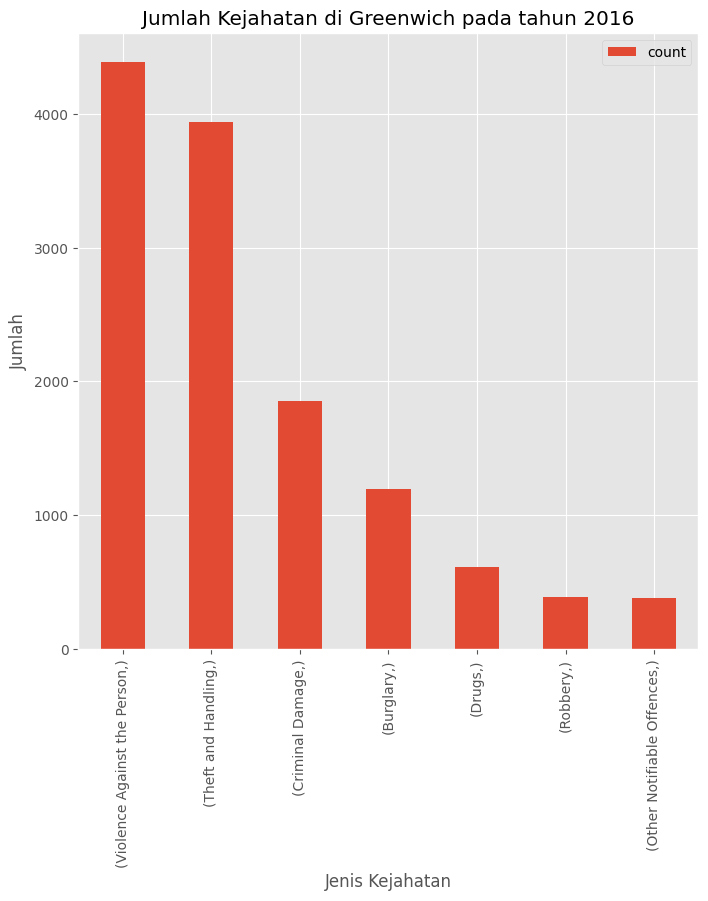

In [16]:
#buat Bar Chart
crime.plot(kind= "bar",
           figsize=(8,8))

plt.title("Jumlah Kejahatan di Greenwich pada tahun 2016")
plt.xlabel("Jenis Kejahatan")
plt.ylabel("Jumlah")
plt.show()

Dari bar chart diatas, dapat diketahui bahwa kejahatan terbanyak di Greenwich pada tahun 2016 adalah kekerasan terhadap manusia, dengan jumlah kejadian sebesar 4386

**AREA PLOT**

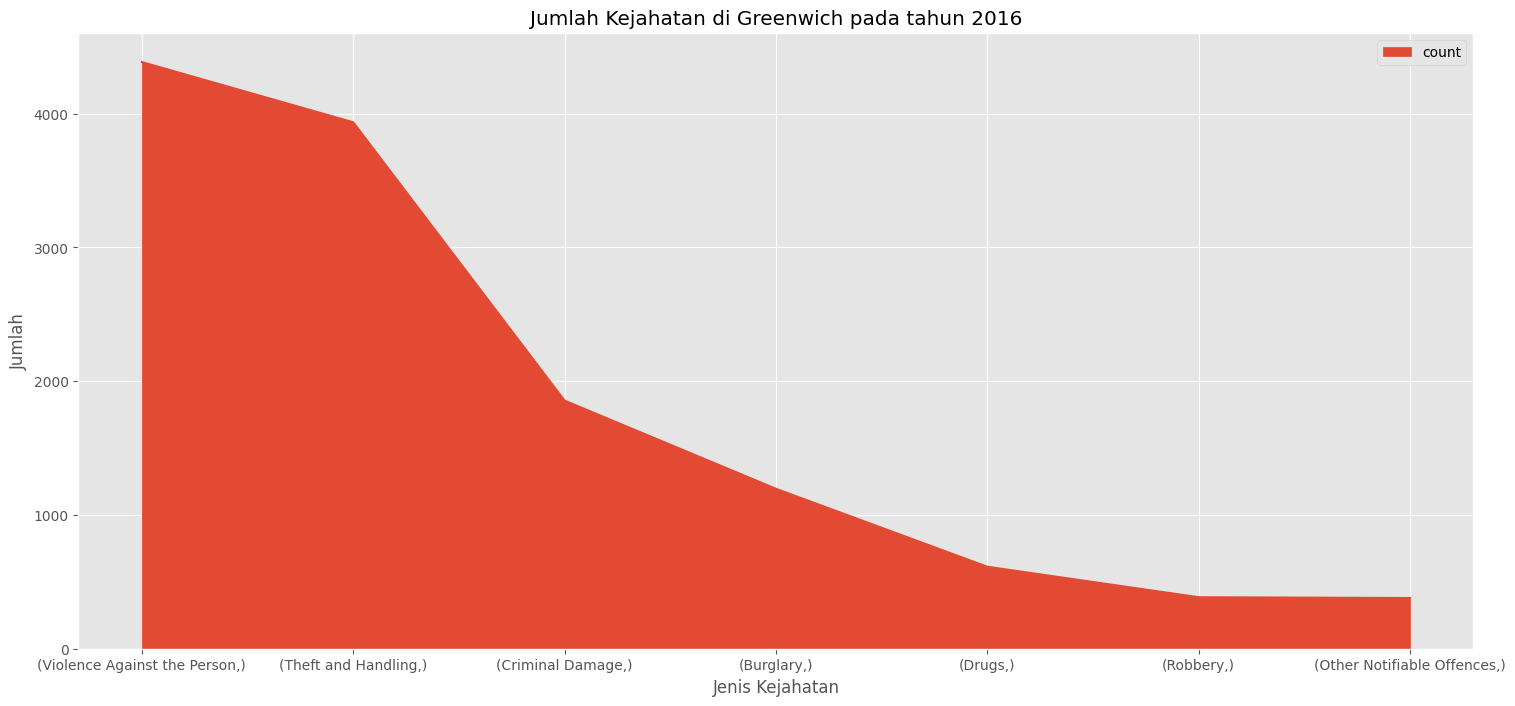

In [17]:
#buat Area Plot
crime.plot(kind= "area",figsize=(18,8))

plt.title("Jumlah Kejahatan di Greenwich pada tahun 2016")
plt.xlabel("Jenis Kejahatan")
plt.ylabel("Jumlah")
plt.show()
           

**PIE CHART**

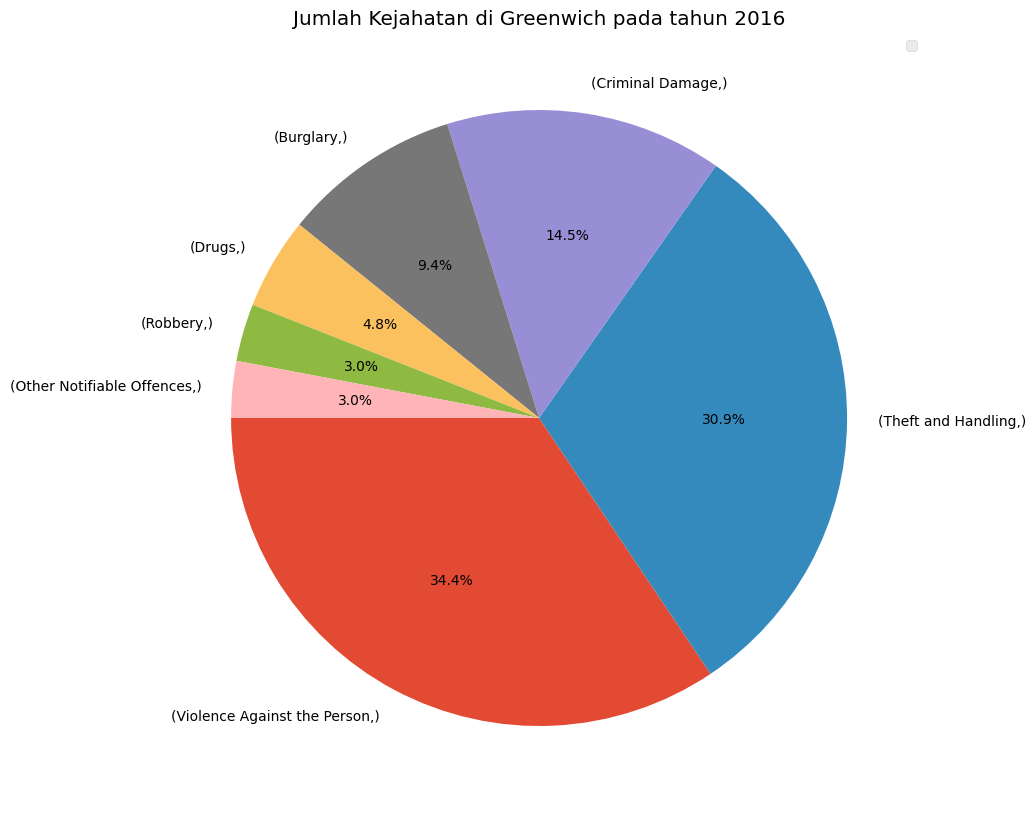

In [18]:
#buat pie chart
crime.plot(kind = "pie",
           figsize=(15, 10),
           startangle=180,
           autopct='%1.1f%%',
           subplots=True)

plt.title("Jumlah Kejahatan di Greenwich pada tahun 2016")
plt.legend('') #menghilangkan legend chart
plt.ylabel('') #menghilangkan tulisan 'count' di kiri chart
plt.show()

Dari pie chart diatas, dapat diketahui bahwa kejahatan paling banyak yang terjadi di Greenwich adalah kekerasan terhadap manusia, dengan persentase sebesar 34.4% dari total 12750 kejadian

Akan dijawab pertanyaan "Bagaimana korelasi antara Greenwich dan Ealing pada tahun 2016?"

data dari Greenwich sudah ada, sekarang cari data untuk Ealing

In [19]:
#data greenwich
gw_crime

,Greenwich
major_category,
Violence Against the Person,4386
Theft and Handling,3936
Criminal Damage,1855
Burglary,1196
Drugs,613
Robbery,385
Other Notifiable Offences,379


In [20]:
#ambil borough Ealing
kon_borough2 = (df_cri["borough"]== "Ealing")
kon_borough2

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: borough, Length: 13490604, dtype: bool

In [21]:
df_cri3 = df_cri[kon_year & kon_borough2 & kon_value]
df_cri3

,lsoa_code,borough,major_category,minor_category,value,year,month
2240,E01001244,Ealing,Violence Against the Person,Other violence,1,2016,3
2603,E01001271,Ealing,Theft and Handling,Theft From Motor Vehicle,2,2016,11
2647,E01001340,Ealing,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,12
3283,E01001366,Ealing,Theft and Handling,Motor Vehicle Interference & Tampering,1,2016,6
3766,E01001214,Ealing,Theft and Handling,Other Theft,1,2016,5
...,...,...,...,...,...,...,...
13487927,E01001372,Ealing,Burglary,Burglary in Other Buildings,1,2016,10
13488401,E01001360,Ealing,Violence Against the Person,Harassment,1,2016,8
13488905,E01001362,Ealing,Burglary,Burglary in Other Buildings,1,2016,10
13488989,E01001387,Ealing,Theft and Handling,Other Theft,1,2016,3


In [22]:
#menghitung jumlah kejahatan 
df_cri3[["major_category"]].value_counts()

major_category             
Violence Against the Person    5007
Theft and Handling             4856
Criminal Damage                1943
Burglary                       1676
Drugs                           825
Robbery                         493
Other Notifiable Offences       484
Name: count, dtype: int64

In [23]:
#jadikan dataframe
crime1 = pd.DataFrame(df_cri3[["major_category"]].value_counts())
crime1

,count
major_category,
Violence Against the Person,5007
Theft and Handling,4856
Criminal Damage,1943
Burglary,1676
Drugs,825
Robbery,493
Other Notifiable Offences,484


In [24]:
#rename count menjadi Ealing
ea_crime = crime1.rename(columns={"count":"Ealing"})
ea_crime

,Ealing
major_category,
Violence Against the Person,5007
Theft and Handling,4856
Criminal Damage,1943
Burglary,1676
Drugs,825
Robbery,493
Other Notifiable Offences,484


In [25]:
#gabung dataframe greenwich dan ealing menjadi satu
crime_con = pd.concat([gw_crime, ea_crime], axis=1, join="outer")
crime_con

,Greenwich,Ealing
major_category,,
Violence Against the Person,4386,5007
Theft and Handling,3936,4856
Criminal Damage,1855,1943
Burglary,1196,1676
Drugs,613,825
Robbery,385,493
Other Notifiable Offences,379,484


**SCATTER PLOT**

<Axes: xlabel='Greenwich', ylabel='Ealing'>

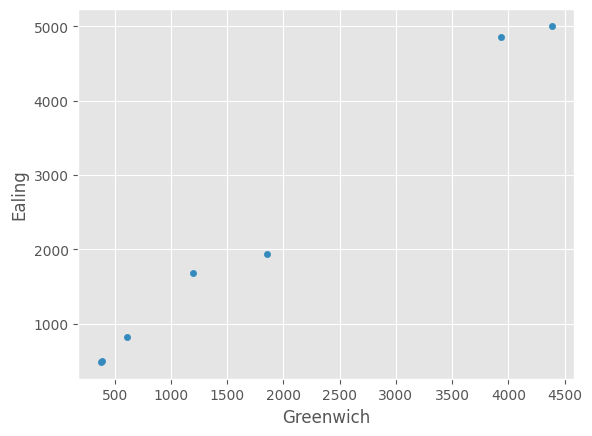

In [26]:
crime_con.plot(kind="scatter", x="Greenwich", y="Ealing")

Dari scatter plot diatas kita tidak yakin apakah ada hubungan antara jumlah kejahatan di Greenwich dan di Ealing. Sepertinya ada, sedikit positif (ke arah kanan atas) tapi tidak terlalu jelas atau tajam, jadi hanya sedikit saja.

**BOX PLOT**

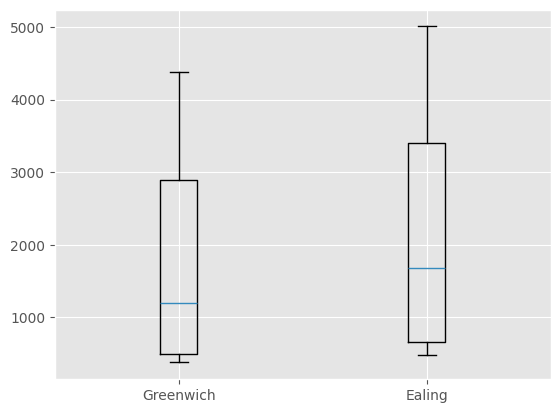

In [27]:
plt.boxplot(crime_con, labels= ["Greenwich","Ealing"])
plt.show()

Dapat terlihat bahwa jumlah kejahatan di Ealing lebih banyak dari Greenwich. 
Jenis kejahatan di dua kota tersebut jenisnya beragam dilihat dari panjang kotak.

**HISTOGRAM**

Akan dijawab pertanyaan : pada bulan apa paling banyak terjadi kejahatan di Greenwich?

dibutuhkan data kejahatan dari tahun 2008-2016 di Greenwich

In [28]:
df_cri2.head(10) #df_cri2 hanya pada tahun 2016

,lsoa_code,borough,major_category,minor_category,value,year,month
858,E01033735,Greenwich,Drugs,Possession Of Drugs,3,2016,3
941,E01001604,Greenwich,Robbery,Personal Property,1,2016,7
3648,E01001672,Greenwich,Theft and Handling,Other Theft,1,2016,7
5577,E01001582,Greenwich,Theft and Handling,Other Theft,5,2016,8
6671,E01001713,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,5
7891,E01033743,Greenwich,Theft and Handling,Other Theft,6,2016,3
8510,E01033726,Greenwich,Violence Against the Person,Harassment,3,2016,3
8969,E01032567,Greenwich,Burglary,Burglary in a Dwelling,3,2016,6
12017,E01001578,Greenwich,Burglary,Burglary in Other Buildings,1,2016,5
12231,E01033746,Greenwich,Violence Against the Person,Wounding/GBH,1,2016,3


In [29]:
#buat dataframe baru
df_cri_gw = df_cri[kon_borough1 & kon_value]
df_cri_gw

,lsoa_code,borough,major_category,minor_category,value,year,month
446,E01033732,Greenwich,Criminal Damage,Other Criminal Damage,1,2013,10
695,E01001588,Greenwich,Violence Against the Person,Wounding/GBH,1,2012,5
812,E01033743,Greenwich,Theft and Handling,Theft From Motor Vehicle,2,2012,12
824,E01001698,Greenwich,Violence Against the Person,Common Assault,1,2014,9
857,E01001659,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2014,1
...,...,...,...,...,...,...,...
13490191,E01001693,Greenwich,Criminal Damage,Criminal Damage To Other Building,2,2010,3
13490367,E01001696,Greenwich,Robbery,Personal Property,2,2015,7
13490419,E01001661,Greenwich,Violence Against the Person,Assault with Injury,2,2016,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8


In [30]:
df_cri_gw.sort_values(by = ['month'])

,lsoa_code,borough,major_category,minor_category,value,year,month
10378385,E01001636,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2010,1
11291350,E01001658,Greenwich,Theft and Handling,Other Theft,1,2013,1
11291358,E01001634,Greenwich,Burglary,Burglary in a Dwelling,1,2016,1
12905605,E01001701,Greenwich,Theft and Handling,Theft From Motor Vehicle,3,2016,1
1928655,E01033727,Greenwich,Burglary,Burglary in Other Buildings,1,2015,1
...,...,...,...,...,...,...,...
7426709,E01001587,Greenwich,Theft and Handling,Handling Stolen Goods,1,2008,12
3288180,E01033744,Greenwich,Theft and Handling,Other Theft,1,2013,12
3288112,E01001615,Greenwich,Drugs,Possession Of Drugs,2,2009,12
3293029,E01001632,Greenwich,Violence Against the Person,Wounding/GBH,1,2012,12


In [31]:
#buat pemisah x-ticks di x-axis nya sesuai dengan maing masing bin di histogram
data_bulan = df_cri_gw['month']
np.histogram(data_bulan)

(array([17089,  8786,  8570,  8818,  8947,  8954,  8620,  8746,  8837,
        17287], dtype=int64),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]))

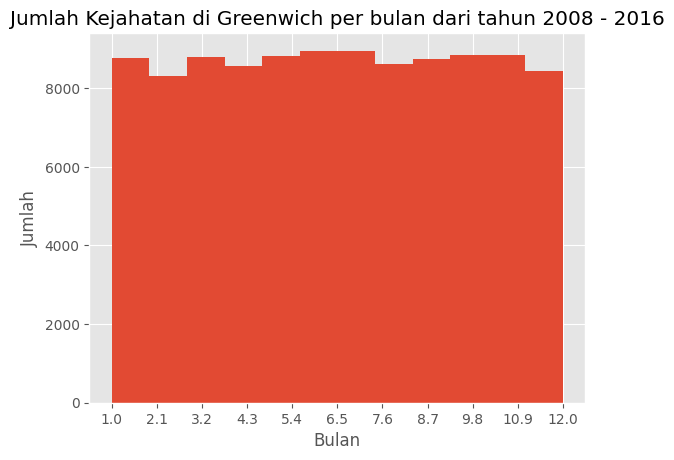

In [32]:
#buat histogramnya
freq, bin_edges = np.histogram(data_bulan)

df_cri_gw['month'].plot(kind="hist",bins = 12) #bins adalah jumlah bin yang diinginkan

plt.title("Jumlah Kejahatan di Greenwich per bulan dari tahun 2008 - 2016")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(bin_edges)
plt.show()


Dari histogram, dapat dilihat jumlah kejahatan per bulannya tidak terlalu berbeda dari bulan lainnya

**WORDCLOUD**

Menampilkan wordcloud dari Kejahatan paling banyak yang terjadi di Greenwich pada tahun 2016

In [33]:
#dataframe Kejahatan paling banyak yang terjadi di Greenwich pada tahun 2016 adalah
df_cri2

,lsoa_code,borough,major_category,minor_category,value,year,month
858,E01033735,Greenwich,Drugs,Possession Of Drugs,3,2016,3
941,E01001604,Greenwich,Robbery,Personal Property,1,2016,7
3648,E01001672,Greenwich,Theft and Handling,Other Theft,1,2016,7
5577,E01001582,Greenwich,Theft and Handling,Other Theft,5,2016,8
6671,E01001713,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,5
...,...,...,...,...,...,...,...
13485151,E01001701,Greenwich,Other Notifiable Offences,Other Notifiable,2,2016,6
13487131,E01001574,Greenwich,Violence Against the Person,Common Assault,6,2016,5
13488204,E01001664,Greenwich,Theft and Handling,Theft From Shops,1,2016,6
13489964,E01001672,Greenwich,Violence Against the Person,Other violence,1,2016,10


In [34]:
#isi dari kolom 'major_category'
df_cri2['major_category'].unique()

array(['Drugs', 'Robbery', 'Theft and Handling',
       'Violence Against the Person', 'Burglary', 'Criminal Damage',
       'Other Notifiable Offences'], dtype=object)

In [35]:
#hapus spasi di major category
df_cri2['major_category'] =df_cri2['major_category'].str.replace(' ', '')
df_cri2


C:\Users\User\AppData\Local\Temp\ipykernel_13128\1787357750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cri2['major_category'] =df_cri2['major_category'].str.replace(' ', '')


,lsoa_code,borough,major_category,minor_category,value,year,month
858,E01033735,Greenwich,Drugs,Possession Of Drugs,3,2016,3
941,E01001604,Greenwich,Robbery,Personal Property,1,2016,7
3648,E01001672,Greenwich,TheftandHandling,Other Theft,1,2016,7
5577,E01001582,Greenwich,TheftandHandling,Other Theft,5,2016,8
6671,E01001713,Greenwich,TheftandHandling,Theft/Taking Of Motor Vehicle,1,2016,5
...,...,...,...,...,...,...,...
13485151,E01001701,Greenwich,OtherNotifiableOffences,Other Notifiable,2,2016,6
13487131,E01001574,Greenwich,ViolenceAgainstthePerson,Common Assault,6,2016,5
13488204,E01001664,Greenwich,TheftandHandling,Theft From Shops,1,2016,6
13489964,E01001672,Greenwich,ViolenceAgainstthePerson,Other violence,1,2016,10


In [36]:
#cek apakah isi kolom sudah tidak ada spasi
df_cri2[["major_category"]].value_counts()

major_category          
ViolenceAgainstthePerson    4386
TheftandHandling            3936
CriminalDamage              1855
Burglary                    1196
Drugs                        613
Robbery                      385
OtherNotifiableOffences      379
Name: count, dtype: int64

In [37]:
#ubah menjadi list
text={'ViolenceAgainstthePerson': 4386,
       'TheftandHandling': 3936, 
       'CriminalDamage': 1855,
        'Burglary': 1196, 
        'Drugs': 613,
        'Robbery': 385, 
        'OtherNotifiableOffences': 379}

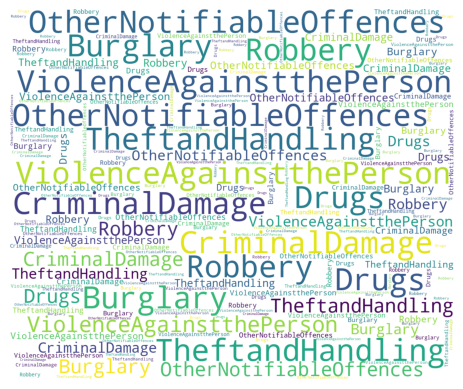

In [38]:
# create word cloud
wc = WordCloud()
wordcloud = WordCloud(width=1200, height=1000, margin=0,repeat=True,background_color="White").generate_from_frequencies(text)

# plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**FOLIUM MAP**

akan ditampilkan peta dari London

In [39]:
#peta London
koor = [51.508282451951075, -0.1275305728996632]

#peta
koor_map = folium.Map(location=koor, zoom_start=13)

#marker
koor_marker = folium.Marker(koor, popup="London")
koor_map.add_child(koor_marker)

#tampilkan map
koor_map

**OVERALL ANALYSIS**

Kejahatan paling banyak yang terjadi di Greenwich pada tahun 2016 adalah kekerasan terhadap manusia (Violence Against the Person), dengan jumlah kejadian sebesar 4386 (34.4%)
Korelasi antara Greenwich dan Ealing pada tahun 2016 tidak dapat diketahui dengan pasti apakah ada hubungan antara jumlah kejahatan di Greenwich dan di Ealing.
Bulan terbanyak terjadinya kejahatan di Greenwich adalah bulan Januari

